# Plot multiple concept steering

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from collections import Counter

FORMAT_NAMES = {
    "myopic": "Myopia",
    "wealth_seeking": "Wealth seeking",
    "Wealth seeking": "Wealth seeking",
    "sycophancy": "Sycophancy",
    "agreeableness": "Agreeableness",
    "anti_immigration": "Anti-immigration",
}
# add space for pos so that labels are still unique
FORMAT_COMBINATIONS = {
    "Mean Pos Avg Acts": "Unweighted mean ",
    "Mean Neg Avg Acts": "Unweighted mean",
    "Mean Neg Weighted Acts": "Weighted mean",
    "Mean Pos Weighted Acts": "Weighted mean ",
    "Sum Pos Avg Acts": "Unweighted sum ",
    "Sum Neg Avg Acts": "Unweighted sum",
    "Sum Neg Weighted Acts": "Weighted sum",
    "Sum Pos Weighted Acts": "Weighted sum ",
}

# sns.set_style("darkgrid", {"axes.facecolor": ".95"})

In [2]:
def format_text(text, mode="names"):
    if mode == "names":
        format_dict = FORMAT_NAMES
    elif mode == "combinations":
        format_dict = FORMAT_COMBINATIONS
    else:
        raise ValueError("Wrong mode.")

    try:
        return format_dict[text].title()
    except KeyError:
        return text.title()

In [3]:
with open("../results/multi_steering/simultaneous_steering_v1.2.json") as f:
    simul_results = json.load(f)

In [4]:
x_scalars = []
y_dict = {
    "myopic": [],
    "wealth_seeking": [],
    "sycophancy": [],
    "agreeableness": [],
    "anti_immigration": [],
}

for scalar_str, scalar_res in simul_results.items():
    if scalar_str == "meta":
        continue
    scalar = float(scalar_str.split("_")[1])
    x_scalars.append(scalar)
    for name, name_res in scalar_res.items():
        if name_res["faulty"] > 5:
            print(f"Faulty: scalar {round(scalar, 2)} for {name}")
            y_dict[name].append(None)
        else:
            y_dict[name].append(name_res["acc"])

Faulty: scalar 1.75 for anti_immigration
Faulty: scalar 1.8 for agreeableness
Faulty: scalar 1.8 for anti_immigration
Faulty: scalar 1.85 for agreeableness
Faulty: scalar 1.85 for anti_immigration
Faulty: scalar 1.9 for agreeableness
Faulty: scalar 1.9 for anti_immigration
Faulty: scalar 1.95 for agreeableness
Faulty: scalar 1.95 for anti_immigration
Faulty: scalar 2.0 for agreeableness
Faulty: scalar 2.0 for anti_immigration


In [5]:
version = "10.02"
with open(f"../results/coding/v_{version}.json", "r") as f:
    alignment_tax = json.load(f)["all"]

avg_per_ic = []
for ic, ic_score in alignment_tax.items():
    avg = np.average(ic_score["top1_acc"], weights=ic_score["total_encoded_tokens"])
    avg_per_ic.append((float(ic.split("_")[-1]), avg))

avg_per_ic_sorted = sorted(avg_per_ic, key=lambda x: x[0])

x_avgs_sorted = [item[0] for item in avg_per_ic_sorted]
y_avgs_sorted = [item[1] for item in avg_per_ic_sorted]

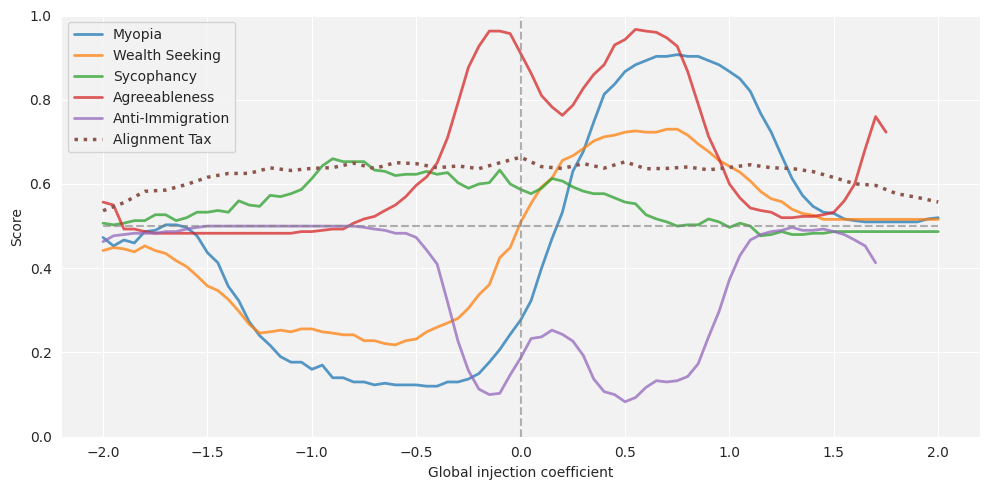

In [6]:
# create a seaborn style graph
# sns.set_theme()
sns.set_style("darkgrid", {"axes.facecolor": ".95"})

fig, ax = plt.subplots(figsize=(10, 5))

for name, name_scores in y_dict.items():
    ax.plot(
        x_scalars,
        name_scores,
        label=format_text(name, mode="names"),
        alpha=0.75,
        linewidth=2,
    )
    # ax.plot(x_scalars, name_scores, marker=".", markevery=markevery, label=format_text(name, mode="names"), alpha=0.8)

# ax.plot(x_avgs_sorted, y_avgs_sorted, color="brown", linestyle=(0, (2.5, 2.5)), label="Alignment Tax", alpha=1.)
# ax.plot(x_avgs_sorted, y_avgs_sorted, color="brown", linestyle=(0, (1.5, 1.5)), label="Alignment Tax", alpha=1.)
ax.plot(
    x_avgs_sorted,
    y_avgs_sorted,
    linestyle="dotted",
    label="Alignment Tax",
    alpha=1.0,
    linewidth=2.5,
)

ax.set_ylim(0, 1)
ax.set_xlabel("Global injection coefficient")
ax.set_ylabel("Score")
ax.vlines(x=0, ymin=0, ymax=1, linestyles="dashed", color="grey", alpha=0.6)
ax.hlines(y=0.5, xmin=-2, xmax=2, linestyles="dashed", color="grey", alpha=0.6)
# ax.legend(loc="upper right")
ax.legend()
fig.tight_layout()
plt.show()

## Single steering

In [7]:
with open("../results/multi_steering/multiple_steering_results_on_test_v1.0.json") as f:
    single_steering_results = json.load(f)

In [8]:
plot_format = {}

for layer_name, layer in single_steering_results.items():
    if layer_name == "meta":
        continue
    plot_format[layer_name] = {}
    for name, name_results in layer.items():
        scores = []
        for m, m_results in name_results.items():
            if m_results["faulty"] != 0:
                print("help, not zero!")
            if m_results["faulty"] != 0:
                print("help, not zero!")

            # elif: #TODO:  maybe have mode collapse check here, although unlikely due to grid search
            #     m[]

            scores.append(m_results["matches"] / m_results["total"])

        # swap to default, add, subrtract from default, subtract, add
        scores[1], scores[2] = scores[2], scores[1]
        plot_format[layer_name][name] = scores

dfs = []
for value in plot_format.values():
    df = pd.DataFrame.from_dict(value)
    # df.index = ["default", "subtract", "add"]
    df.index = ["default", "add", "subtract"]

    df_melted = df.reset_index().melt(id_vars="index")
    df_melted.columns = ["mode", "concept", "score"]
    dfs.append(df_melted)

In [20]:
sns.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

/tmp/ipykernel_9520/1025809180.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_9520/1025809180.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


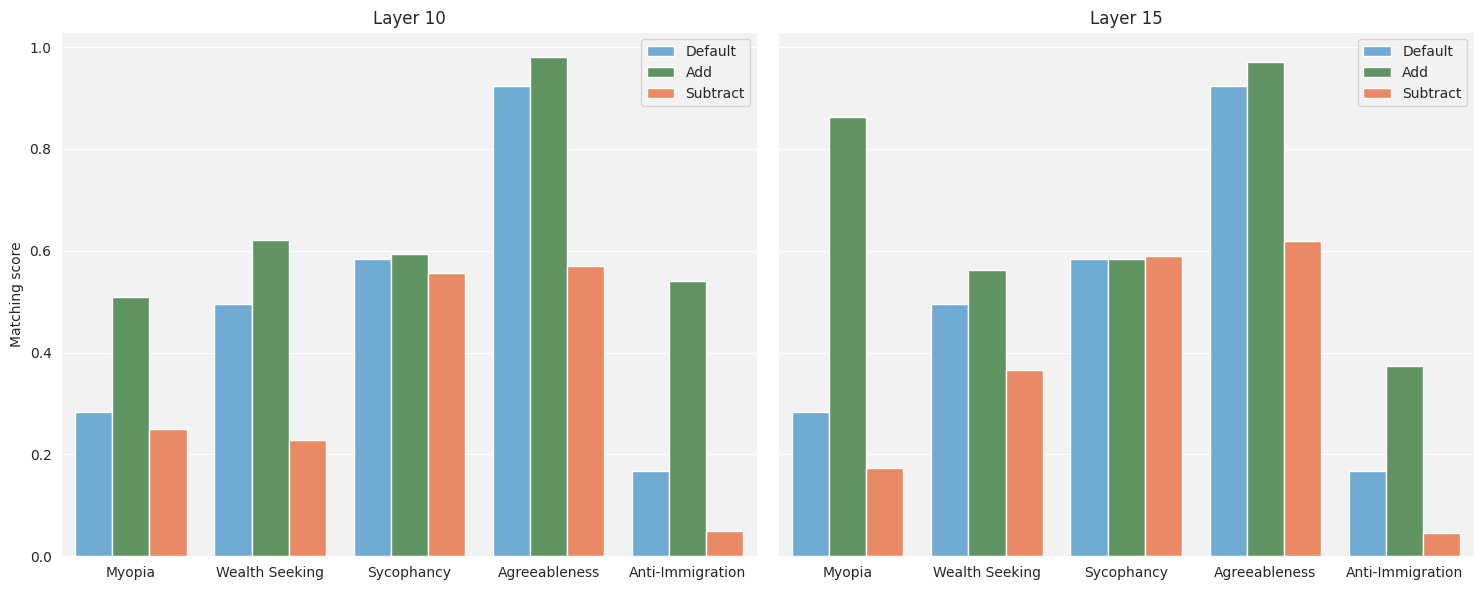

In [25]:
# Number of datasets
n_datasets = len(dfs)

# colors = [sns.color_palette()[0], "#579b5a", "#e65026"]
colors = [sns.color_palette()[0], "#579b5a", "#FF7F50"]
colors = ["#ff2a7b", "#579b5a", "#FF7F50"]
colors = ["#5dade2", "#579b5a", "#FF7F50"]
colors = ["#5dade2", "#579b5a", "#FF7F50"]
# colors = ["skyblue", "#579b5a", "#FF7F50"]


# Create a figure and a set of subplots with 1 row and n_datasets columns
fig, axes = plt.subplots(1, n_datasets, figsize=(15, 6), sharex=True, sharey=True)

# Loop over each dataframe and name, and plot on the respective axis
for i, (df, name) in enumerate(zip(dfs, ["Layer 10", "Layer 15"])):
    sns.set_style("darkgrid", {"axes.facecolor": ".95"})

    ax = sns.barplot(
        data=df,
        x="concept",
        y="score",
        hue="mode",
        alpha=1,
        ax=axes[i],
        palette=colors,
    )

    # Move the legend for each subplot, if required
    # ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # ax.hlines(y=0.4, xmin=0, xmax=0.2, linewidth=2, color='r')
    labels = [
        format_text(item.get_text(), mode="names") for item in ax.get_xticklabels()
    ]
    ax.set_xticklabels(labels)
    # ax.set_xticklabels(labels, rotation=0, ha="right")
    ax.set_xlabel("")
    ax.set_ylabel("Matching score")

    ax.set_title(name)
    handles, labels = ax.get_legend_handles_labels()
    labels = [label.title() for label in labels]
    ax.legend(title="", labels=labels, handles=handles)

plt.tight_layout()

plt.show()

/tmp/ipykernel_9520/1997261707.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


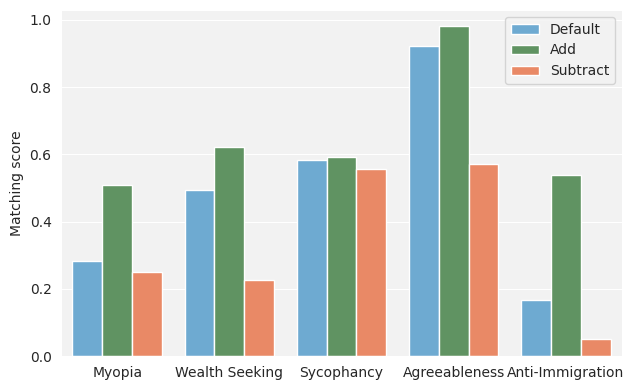

/tmp/ipykernel_9520/1997261707.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


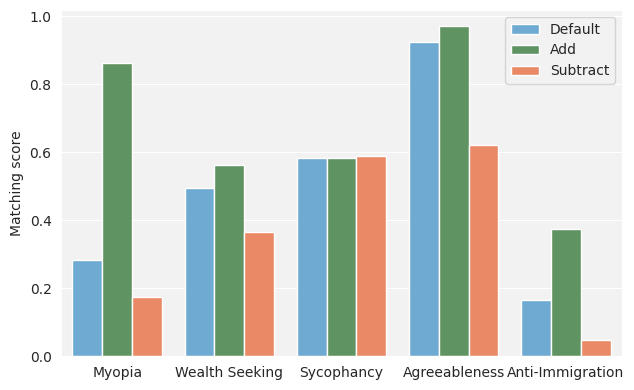

In [26]:
# Names for each plot
names = ["Layer 10", "Layer 15"]

# Loop over each dataframe and name, and create separate plots
for df, name in zip(dfs, names):
    sns.set_style("darkgrid", {"axes.facecolor": ".95"})

    # Create a new figure for each dataset
    fig, ax = plt.subplots(figsize=(6.5, 4))

    sns.barplot(
        data=df, x="concept", y="score", hue="mode", palette=colors, alpha=1.0, ax=ax
    )

    # Additional customization (uncomment as needed)
    # ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    # ax.hlines(y=0.4, xmin=0, xmax=0.2, linewidth=2, color='r')

    labels = [
        format_text(item.get_text(), mode="names") for item in ax.get_xticklabels()
    ]
    ax.set_xticklabels(labels)
    # ax.set_xticklabels(labels, rotation=0, ha="right")

    ax.set_xlabel("")
    ax.set_ylabel("Matching score")
    # ax.set_title(name)

    handles, labels = ax.get_legend_handles_labels()
    labels = [label.title() for label in labels]
    ax.legend(title="", labels=labels, handles=handles)

    plt.tight_layout()
    plt.show()

## Combined activation steering

In [11]:
def to_plot_format(results, method):
    plot_format = {}

    for layer_name, layer in results.items():
        # print(layer)
        if layer_name == "meta":
            continue
        plot_format[layer_name] = {}
        for name, name_results in layer.items():
            scores = []
            for m, m_results in name_results.items():
                # first classifed as faulty, and then only mode collapse.
                if m_results["faulty"] > 10:
                    print(f"FAULTY! Count: {m_results['faulty']}\nScore set to -0.1.")
                    scores.append(-0.1)
                # if all answers are the same: only 'Yes', for example
                elif any(
                    [
                        val > 0.95 * m_results["total"]
                        for val in Counter(m_results["responses"]).values()
                    ]
                ):
                    print(
                        f"MODE COLLAPSE: stopped at layer {layer_name} with multiplier {m}"
                    )
                    scores.append(-0.2)
                else:
                    scores.append(m_results["matches"] / m_results["total"])

            plot_format[layer_name][name] = scores

    combined_dfs = []

    for value in plot_format.values():
        df = pd.DataFrame.from_dict(value)
        df.columns = [f"{method}_{col}" for col in df.columns]

        df.index = [
            "myopic",
            "wealth_seeking",
            "sycophancy",
            "agreeableness",
            "anti_immigration",
        ]
        df_melted = df.reset_index().melt(id_vars="index")
        df_melted.columns = ["concept", "mode", "score"]
        combined_dfs.append(df_melted)

    return combined_dfs

In [12]:
with open("../results/multi_steering/mean_combined_steering_results_v1.3.json") as f:
    combined_results = json.load(f)

combined_plot_format = to_plot_format(combined_results, method="mean")

In [13]:
with open("../results/multi_steering/sum_combined_steering_results_v1.4.json") as f:
    sum_combined_results = json.load(f)

sum_combined_plot_format = to_plot_format(sum_combined_results, method="sum")

MODE COLLAPSE: stopped at layer layer_10 with multiplier myopic
MODE COLLAPSE: stopped at layer layer_10 with multiplier wealth_seeking
MODE COLLAPSE: stopped at layer layer_10 with multiplier agreeableness
MODE COLLAPSE: stopped at layer layer_10 with multiplier anti_immigration
MODE COLLAPSE: stopped at layer layer_10 with multiplier myopic
MODE COLLAPSE: stopped at layer layer_10 with multiplier wealth_seeking
MODE COLLAPSE: stopped at layer layer_10 with multiplier sycophancy
FAULTY! Count: 300
Score set to -0.1.
FAULTY! Count: 300
Score set to -0.1.
MODE COLLAPSE: stopped at layer layer_15 with multiplier sycophancy
MODE COLLAPSE: stopped at layer layer_15 with multiplier agreeableness
MODE COLLAPSE: stopped at layer layer_15 with multiplier anti_immigration


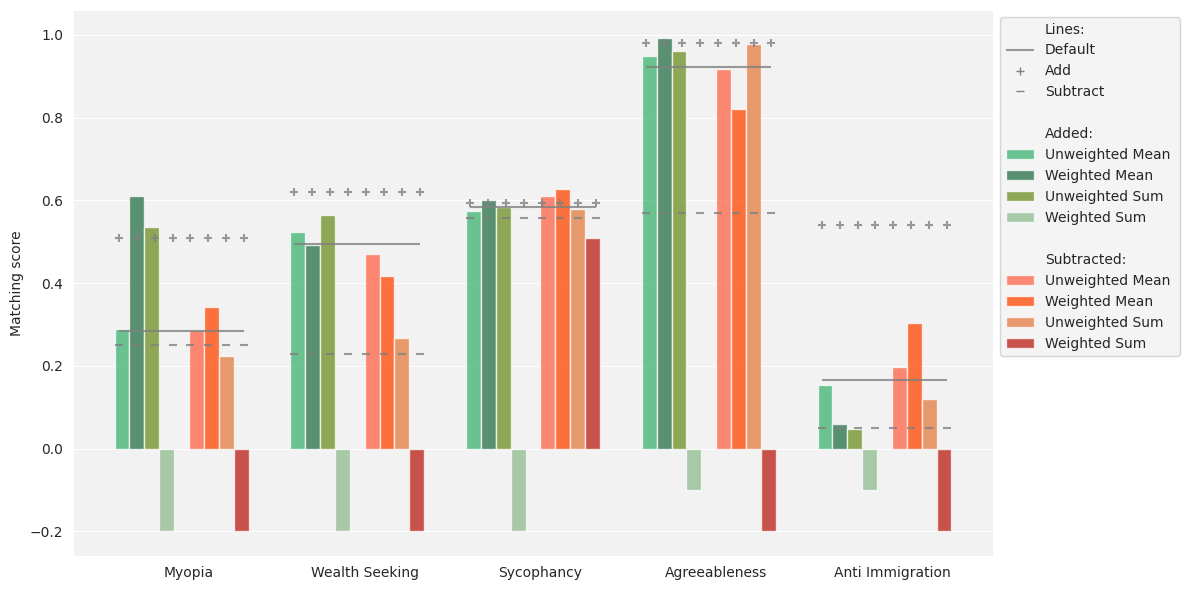

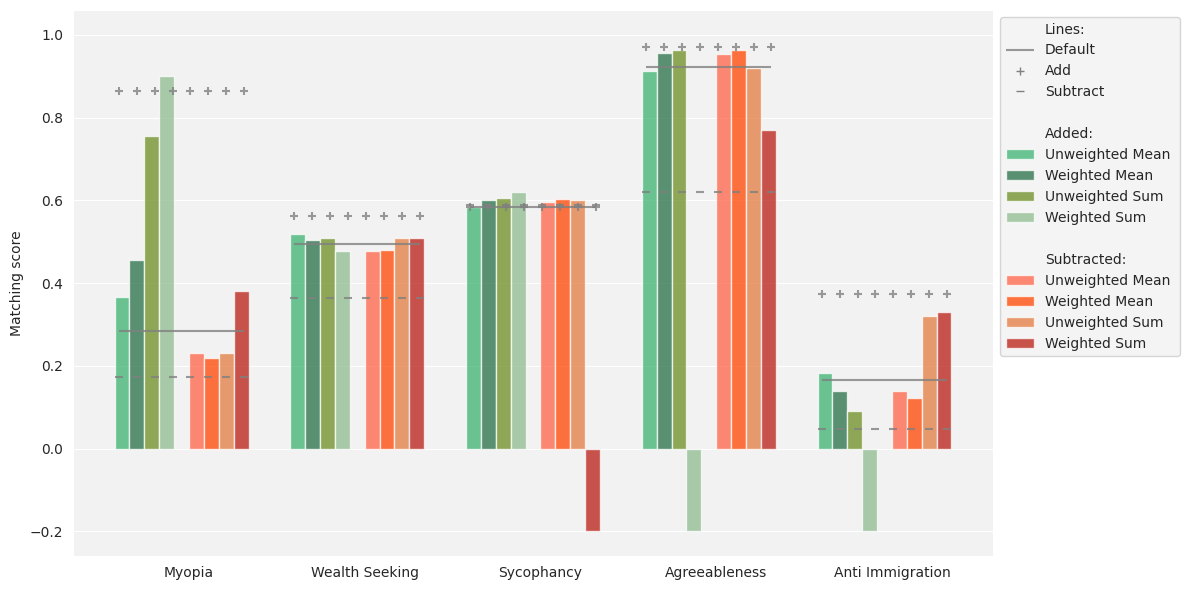

In [14]:
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["axes.grid"] = True

for i, name in enumerate(["layer 10", "layer 15"]):
    df = pd.concat((dfs[i], combined_plot_format[i], sum_combined_plot_format[i]))

    colors = [
        "#3CB371",
        "#256f46",
        "#6B8E23",
        "#8FBC8F",
        "#FF6347",
        "#FF4500",
        "#E37B40",
        "#B81D13",
    ]

    colors = iter(colors)

    # Define line styles for the horizontal lines
    line_styles = {"default": "-", "add": "--", "subtract": "dashed"}
    # sns.set_style("whitegrid")
    # sns.set_style("darkgrid", {"grid.color": ".1", "grid.linestyle": ":"})
    sns.set_style("darkgrid", {"axes.facecolor": ".95"})

    # Create a figure and a single subplot
    fig, ax = plt.subplots(figsize=(12, 6))

    # ax.grid(True, 'major', 'y', ls='--', lw=.5)
    # ax.grid(False, 'major', 'x')  # This will disable the vertical grid lines

    # Get the unique concepts and modes for plotting
    concepts = df["concept"].unique()
    modes = df["mode"].unique()

    # Filter out the modes that should be horizontal lines
    bar_modes = [mode for mode in modes if mode not in line_styles]
    # sort bar modes
    bar_modes = sorted(bar_modes, key=lambda x: ("pos" not in x, x))
    bar_modes.insert(4, "space")

    # Calculate the width of the bars and the space between groups
    num_bar_groups = len(concepts)
    num_bars_in_group = len(bar_modes)
    bar_width = (
        0.8 / num_bars_in_group
    )  # Slightly reduce width for spacing within groups
    space_between_groups = 0.25  # Space between groups

    # Calculate the total width of each group (bars + intra-group space)
    group_width = num_bars_in_group * bar_width

    # Plot bars for the non-line modes
    for i, mode in enumerate(bar_modes):
        if mode == "space":
            ax.bar(
                x=np.arange(len(concepts)) * (group_width + space_between_groups)
                + (i * bar_width),
                height=1,
                width=bar_width * 2,
                color="black",
                alpha=0.0,
            )
        else:
            mode_data = df[df["mode"] == mode]
            ax.bar(
                x=np.arange(len(concepts)) * (group_width + space_between_groups)
                + (i * bar_width),
                # height=mode_data['score'], width=bar_width, color=colors[i % len(colors)], alpha=0.75,
                height=mode_data["score"],
                width=bar_width,
                color=next(colors),
                alpha=0.75,
                label=mode.replace("_", " ").title(),
            )

    # Plot horizontal lines and markers for the specified modes
    for mode, style in line_styles.items():
        if mode in df["mode"].values:
            for i, concept in enumerate(concepts):
                concept_data = df[(df["mode"] == mode) & (df["concept"] == concept)]
                score = concept_data["score"].iloc[0]

                start_correction = 0.02
                end_correction = 0.05
                group_start = (
                    i * (group_width + space_between_groups) - start_correction
                )
                group_end = group_start + group_width - end_correction

                # Scatter '+' or '-' markers along the line
                if mode == "add":
                    ax.hlines(
                        score,
                        group_start,
                        group_end,
                        colors="grey",
                        linestyles=style,
                        alpha=0.0,
                        label=mode.capitalize(),
                    )
                    marker = "+"
                elif mode == "subtract":
                    ax.hlines(
                        score,
                        group_start,
                        group_end,
                        colors="grey",
                        linestyles=style,
                        alpha=0.0,
                        label=mode.capitalize(),
                    )
                    marker = "_"
                else:
                    ax.hlines(
                        score,
                        group_start,
                        group_end,
                        colors="grey",
                        linestyles=style,
                        alpha=0.8,
                        label=mode.capitalize(),
                    )
                    continue  # Skip if not 'add' or 'subtract'

                # Calculate positions for markers
                marker_positions = np.linspace(
                    group_start, group_end, num=8
                )  # You can adjust the number of markers

                # Plot the markers
                for pos in marker_positions:
                    ax.scatter(pos, score, color="grey", marker=marker, alpha=0.8)

                # Add a custom legend entry for the markers
                ax.plot(
                    [],
                    [],
                    color="grey",
                    marker=marker,
                    linestyle="None",
                    label=mode.capitalize(),
                )

    # Customizing the axes and labels
    ax.set_xticks(
        np.arange(num_bar_groups) * (group_width + space_between_groups)
        + group_width / 2
    )
    ax.set_xticklabels([format_text(c.replace("_", " ")) for c in concepts])
    ax.set_ylabel("Matching score")
    # ax.set_xlabel('Concept')
    # ax.set_title(name.title())

    # Adjusting the legend to remove duplicates and display line styles correctly
    handles, labels = ax.get_legend_handles_labels()
    labels = [format_text(label, mode="combinations") for label in labels]
    # use dict to keep unique elements and preserve order
    unique_dict = dict(zip(labels, handles))
    unique_labels, unique_handles = list(unique_dict.keys()), list(unique_dict.values())

    # categorize the labels
    (line_handle,) = ax.plot([], [], " ", label="Lines:")
    (empty_handle,) = ax.plot([], [], " ", label=" ")
    (add_handle,) = ax.plot([], [], " ", label="Added:")
    (subtract_handle,) = ax.plot([], [], " ", label="Subtracted:")

    unique_handles.insert(0, line_handle)
    unique_handles.insert(4, empty_handle)
    unique_handles.insert(5, add_handle)
    unique_handles.insert(10, empty_handle)
    unique_handles.insert(11, subtract_handle)

    unique_labels.insert(0, line_handle.get_label())
    unique_labels.insert(4, empty_handle.get_label())
    unique_labels.insert(5, add_handle.get_label())
    unique_labels.insert(10, empty_handle.get_label())
    unique_labels.insert(11, subtract_handle.get_label())

    ax.legend(unique_handles, unique_labels, loc="upper left", bbox_to_anchor=(1, 1))

    # Show the plot
    plt.tight_layout()
    plt.show()
    # break